# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Importing training data the dataset

In [2]:
df=pd.read_csv('Insurance_train.csv')

# EDA

In [3]:
df.shape

(58592, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
obj=df.select_dtypes('object').columns

In [6]:
# number of categorical variables
len(obj)

28

In [7]:
pd.set_option('display.max_columns',100)

In [8]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [9]:
# By seeing the dataset we come to know that our model will be a supervised binary classification model.
# Our target variable is 'is_claim'.

In [10]:
#checking for missing values
df.isnull().sum().sum()

0

In [11]:
# we have zero missing values

In [12]:
# checking for unapproriate data by checking the unique values in the Independent variables
for i in df.columns:
    print('*'*20,i,'*'*20)
    if df[i].nunique()<25:
        print(df[i].unique())
        print(f' unique:{df[i].nunique()}')
    else:
        print(f' unique: {df[i].nunique()}')
    print()

******************** policy_id ********************
 unique: 58592

******************** policy_tenure ********************
 unique: 58592

******************** age_of_car ********************
 unique: 49

******************** age_of_policyholder ********************
 unique: 75

******************** area_cluster ********************
['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
 unique:22

******************** population_density ********************
[ 4990 27003  4076 21622 34738 13051  6112  8794 17804 73430  6108 34791
  5410  7788   290 16206 65567 35036 27742 20905  3264 16733]
 unique:22

******************** make ********************
[1 2 3 4 5]
 unique:5

******************** segment ********************
['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
 unique:6

******************** model ********************
['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
 unique:11

******************** fuel_type *

In [13]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [14]:
# storing numeric column names for further study
num_columns=df.describe().columns

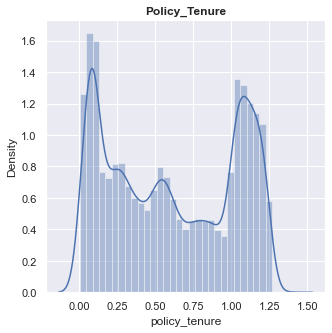

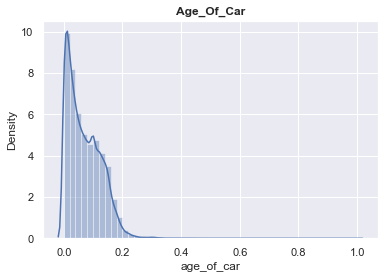

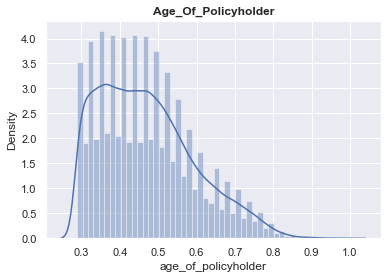

In [15]:
# we have continuous values for policy_tenure, age_of_car and age_of_policyholder we can plot the ditribution on these variables
dist_columns= ['policy_tenure','age_of_car','age_of_policyholder']
plt.figure(figsize=(5,5))
for i in dist_columns:
    sns.distplot(df[i])
    plt.title(f'{i.title()}',weight='bold')
    plt.show()

In [16]:
#we can see skewness in columns age_of_policyholder and age_of_policyholder

In [17]:
# we can plot the count plot for the remaining variables in numerical dataset.
count_columns=['population_density','make','airbags','displacement','cylinder',
               'gear_box','turning_radius','length','width','height','gross_weight','ncap_rating']

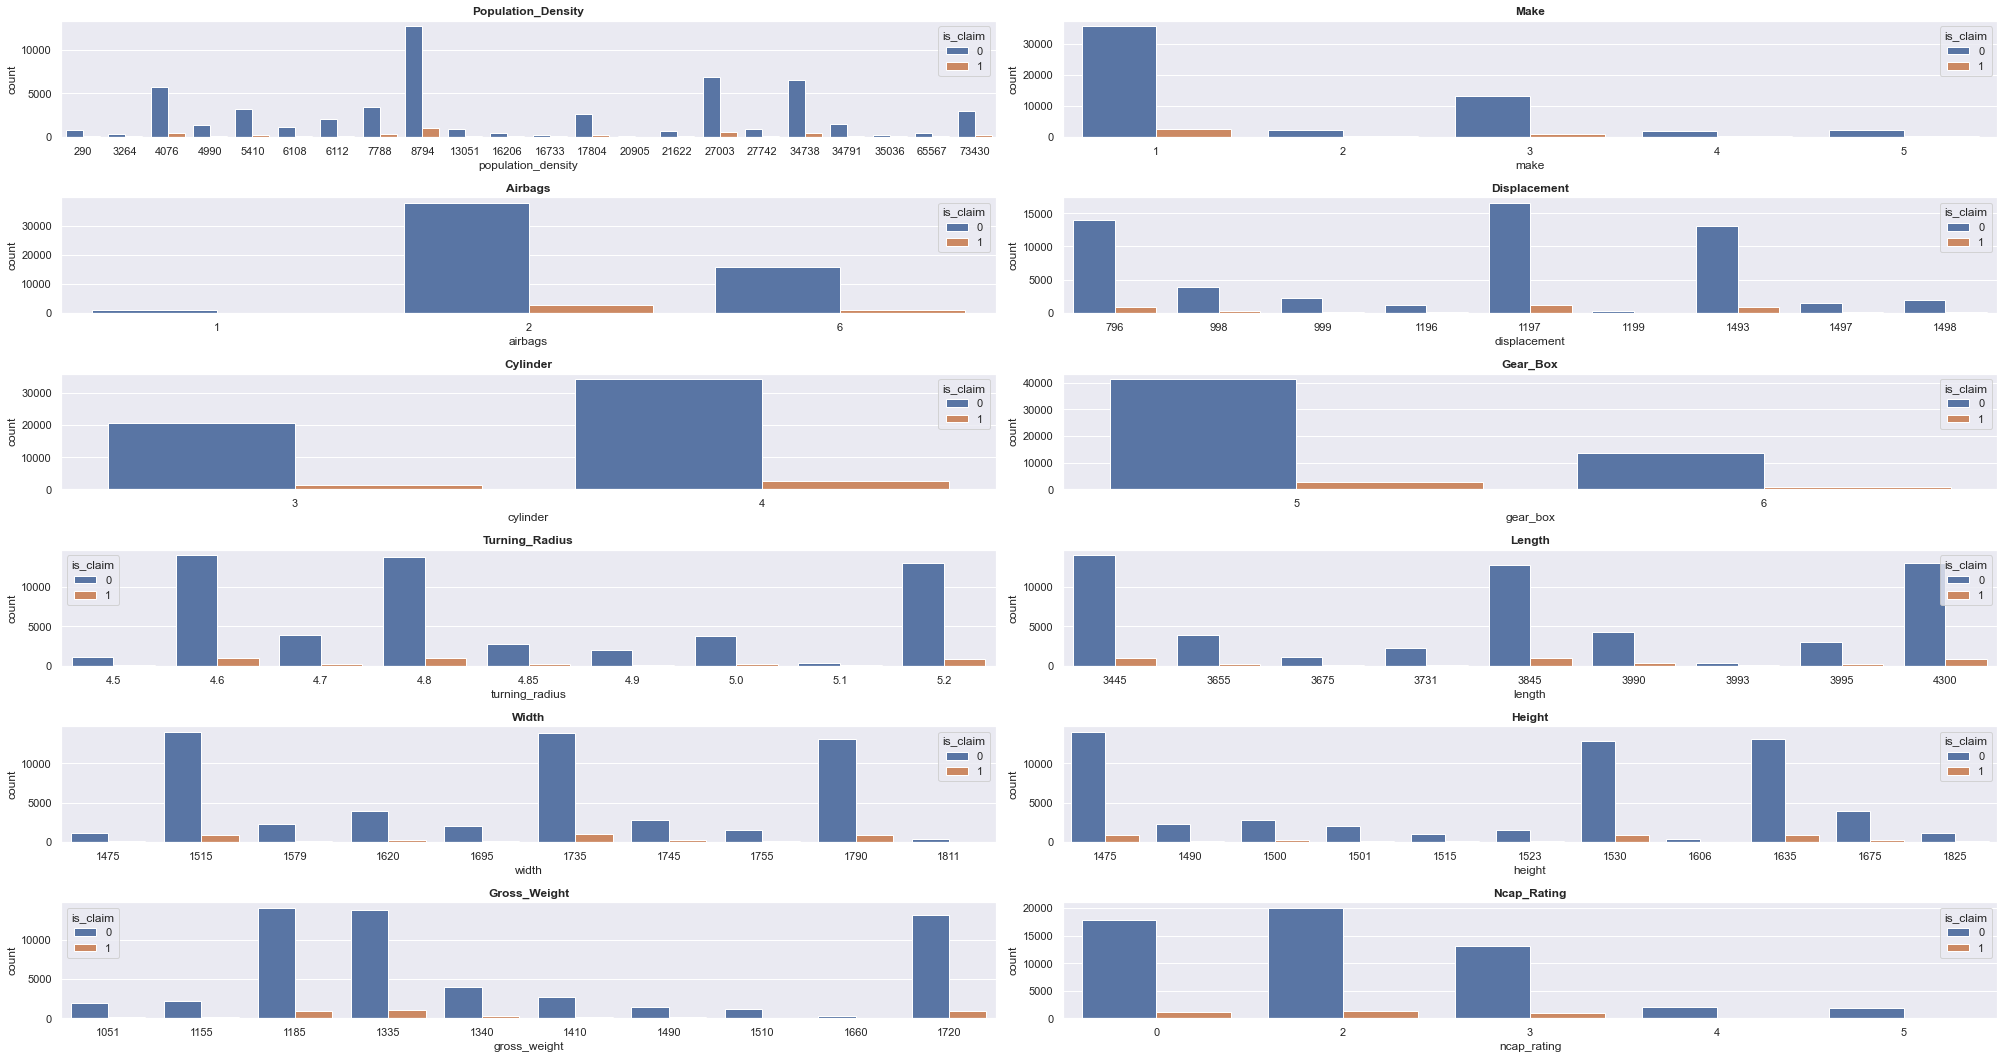

In [23]:
plt.figure(figsize=(28,34))
for n,i in enumerate(count_columns):
    plot=plt.subplot(14,2,n+1)
    sns.countplot(df[i],hue=df['is_claim'])
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

In [24]:
# categorical variables study.
cat_variables=df.select_dtypes(include=object).columns
len(cat_variables)

28

In [25]:
# as we can see that 'policy_id' is just a referance number we can drop it from analysys
cat_variables=cat_variables.drop('policy_id')

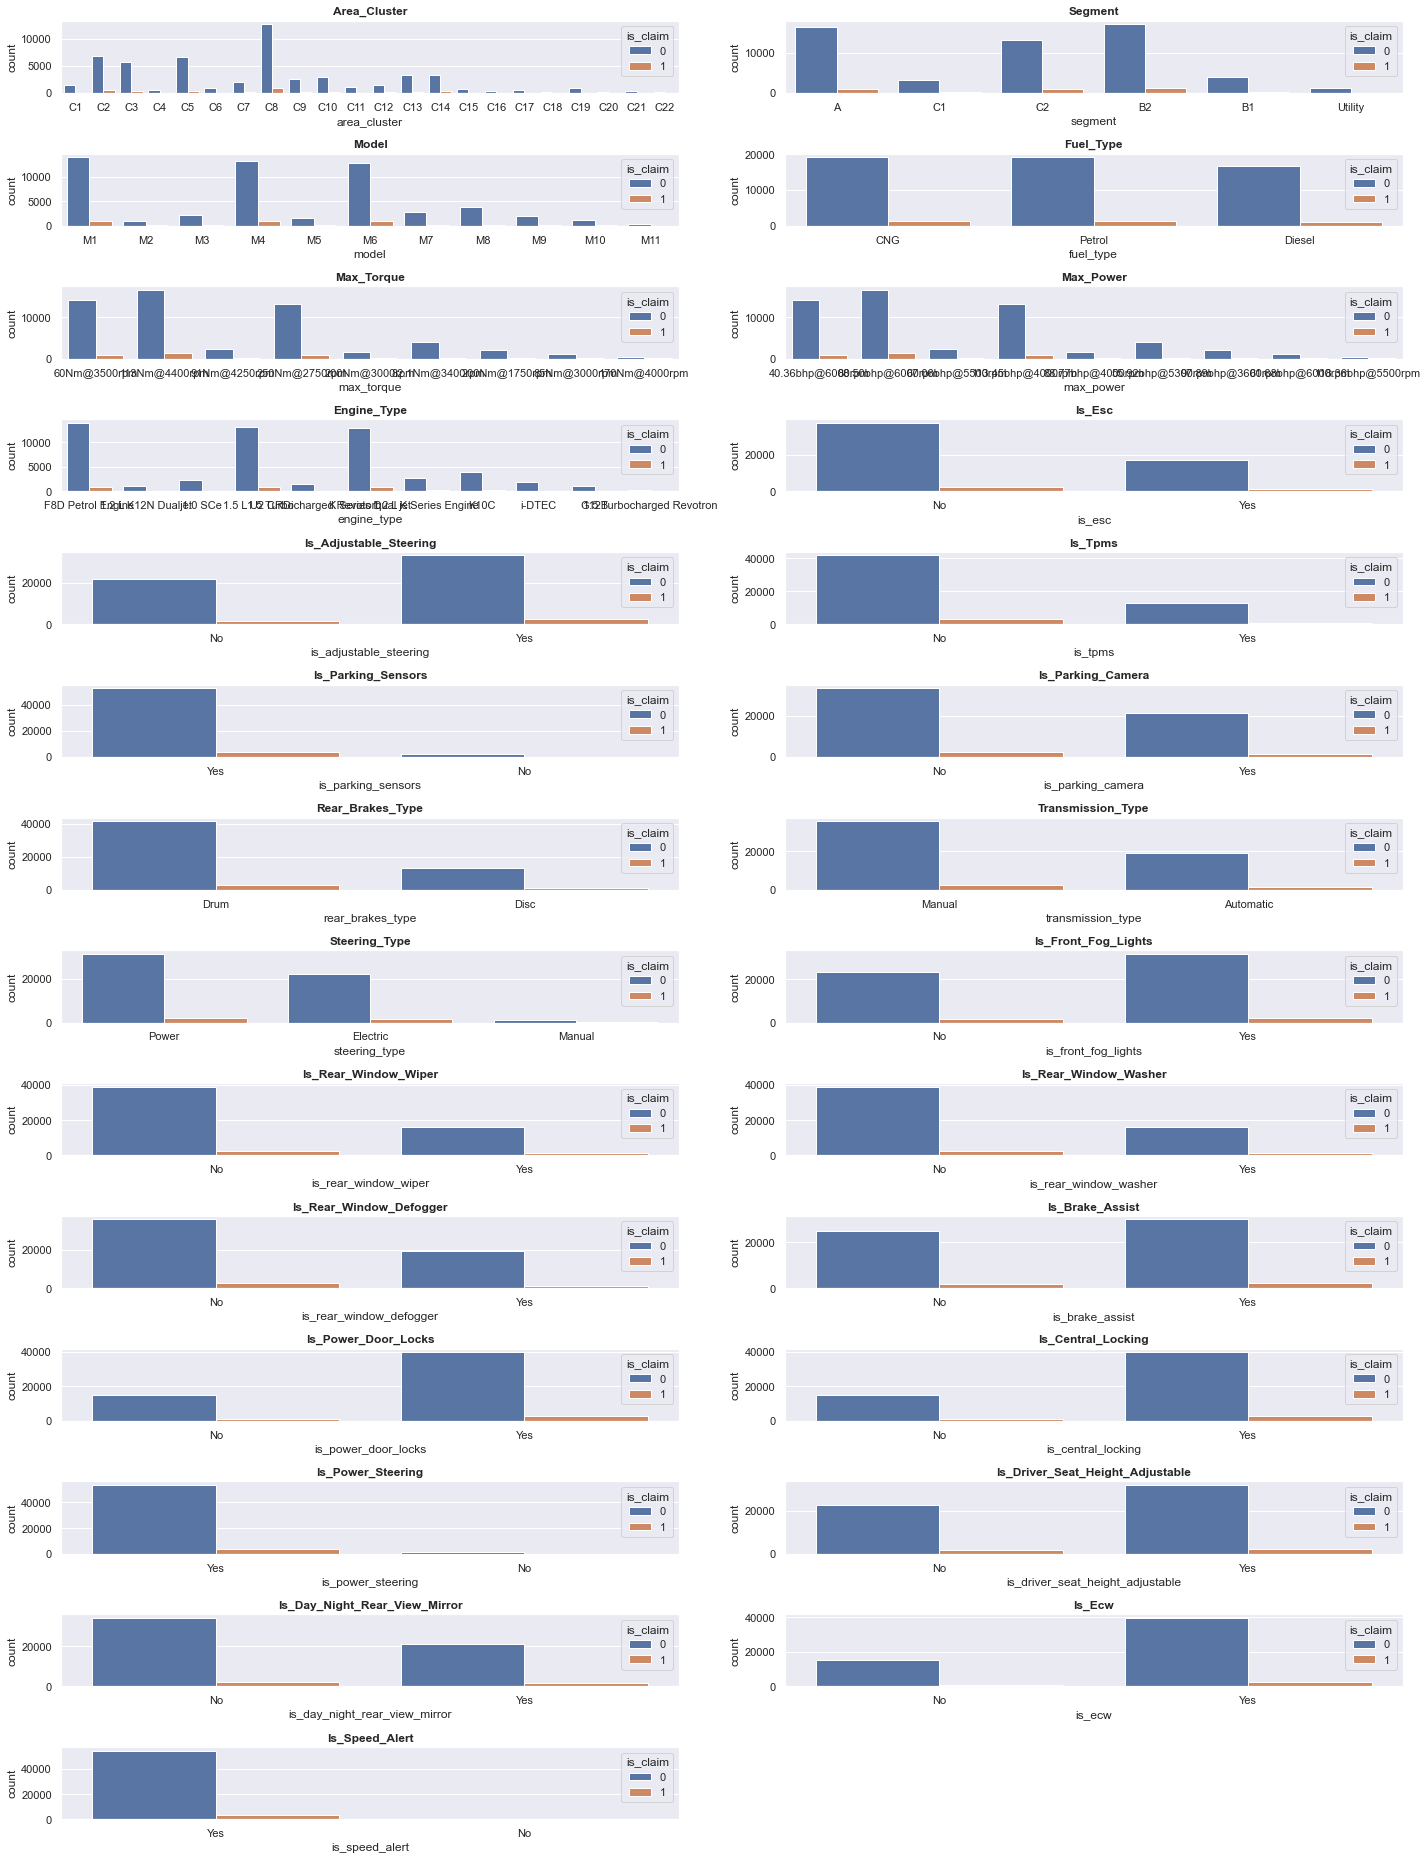

In [26]:
plt.figure(figsize=(20,26))
for n,i in enumerate(cat_variables):
    plot=plt.subplot(14,2,n+1)
    sns.countplot(df[i],hue=df['is_claim'])
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

In [27]:
# Data imbalance check
df['is_claim'].value_counts()/len(df)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

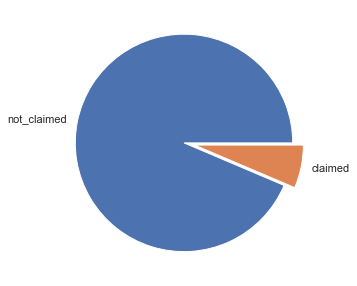

In [28]:
# for visualization purpose lets label 0 and 1 in 'is_claim' variable as 'not_claimed' and 'claimed' repectively
plt.figure(figsize=(5,5))
explode = [0, 0.1]
plt.pie(df['is_claim'].value_counts(),labels=['not_claimed','claimed'],explode=explode)
plt.show()

In [ ]:
# we can conclude that the data we have is highly imbalanced.

# Preprocessing.

In [29]:
# From the above analysis we can see some categorical variables present in numerical graph study.
#Lest bifergate the  appropriate categorical (binary,multivariate) from appropriate numerical data.

In [30]:
f_num_variables=[]
for i in num_columns:
    #print(i)
    if df[i].nunique() >5:
        f_num_variables.append(i)

In [31]:
f_num_variables

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [32]:
f_cat_variables=[]
for i in df.columns:
    if i not in f_num_variables:
        f_cat_variables.append(i)

In [33]:
f_cat_variables

['policy_id',
 'area_cluster',
 'make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim']

In [34]:
#cross check of variables
total_columns= len(f_num_variables)+len(f_cat_variables)
print(total_columns)

44


In [ ]:
# tuning the skewed data
# as we have skewed data in columns 'age_of_car' and 'age_of_policyholder' we can reduce the skewness by treating data 
# by PowerTransformer by method='yeo-johnson'

In [35]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [36]:
df.loc[:,['age_of_car','age_of_policyholder']]=pt.fit_transform(pd.DataFrame(df.loc[:,['age_of_car','age_of_policyholder']]))

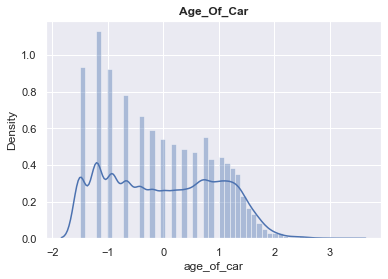

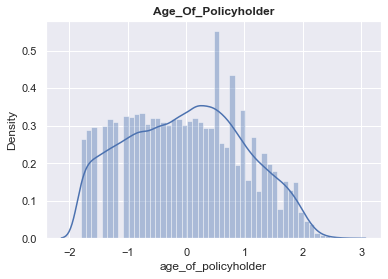

In [37]:
# checking PowerTransformer tuning the data
for i in (['age_of_car','age_of_policyholder']):
    sns.distplot(df[i])
    plt.title(f'{i.title()}',weight='bold')
    plt.show()

In [38]:
# we can see significance change in the distribution so we are going to keep the changes done on data.

In [39]:
# By seeing data columns like "max_torque" and "max_power" can be treated and form two numerical variables

In [40]:
# filtering torque from "max_torque"
df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
# filtering max_rpm at max_torque from "max_torque"
df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
# droping original "max_torque" column
df.drop("max_torque",axis=1,inplace=True)


# filtering torque from "max_power"    
df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
# filtering max_rpm at max_power from "max_torque"
df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
# dropping original "max_power" column
df.drop("max_power",axis=1,inplace=True)

In [41]:
df.shape

(58592, 46)

In [42]:
df.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,0.515874,-0.200500,1.354890,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,-0.923772,-0.748659,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0


In [43]:
# encoding the categorical variables for further analysis
# encoding with One-hot encoder for proper results


In [44]:
one_hot_var=[i for i in f_cat_variables if i not in ['policy_id','max_torque','max_power','is_claim']]

In [45]:
df_encoded=pd.get_dummies(data=df,columns=one_hot_var,drop_first=True)

In [46]:
df_encoded.shape

(58592, 97)

In [47]:
df_encoded.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,displacement,turning_radius,length,width,height,gross_weight,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,cylinder_4,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,ID00001,0.515874,-0.200500,1.354890,4990,796,4.6,3445,1515,1475,1185,0,60.0,3500.0,40.36,6000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,ID00002,0.672619,-0.923772,-0.748659,27003,796,4.6,3445,1515,1475,1185,0,60.0,3500.0,40.36,6000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# variable selection
# as we see "policy_id" is just a referance number for each obsevation so we can drop it directly

In [48]:
df_encoded.drop('policy_id',axis=1,inplace=True)

In [49]:
df_encoded.shape

(58592, 96)

# Independent variable selection

In [50]:
# Here we cannot use correlation matrix directly for reducing the independent variables by checking correlation.
# instead we use P-value for numerical columns selection

In [51]:
l=["max_torque_Nm","max_torque_rpm","max_power_bhp","max_power_rpm"]
for i in l:
    f_num_variables.append(i)
    

In [52]:
import scipy
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2

In [53]:
for col in f_num_variables:
    x1=df_encoded.loc[(df_encoded.is_claim==0),col]
    x2=df_encoded.loc[(df_encoded.is_claim==1),col]
    pval=scipy.stats.ttest_ind(x1,x2)
    print(col,pval)

policy_tenure Ttest_indResult(statistic=-19.12048889791518, pvalue=3.0181155800814643e-81)
age_of_car Ttest_indResult(statistic=6.690351367978584, pvalue=2.246308039868693e-11)
age_of_policyholder Ttest_indResult(statistic=-5.369004277864668, pvalue=7.947294140806103e-08)
population_density Ttest_indResult(statistic=4.311257788753685, pvalue=1.6259324287865866e-05)
displacement Ttest_indResult(statistic=-1.8585063217973412, pvalue=0.06310215766252036)
turning_radius Ttest_indResult(statistic=-0.6594107220481331, pvalue=0.5096346505223106)
length Ttest_indResult(statistic=-1.572060185300122, pvalue=0.11594199374360714)
width Ttest_indResult(statistic=-2.407839933146624, pvalue=0.01605028483903441)
height Ttest_indResult(statistic=0.4898049613477159, pvalue=0.624273753492979)
gross_weight Ttest_indResult(statistic=-0.9426618354669778, pvalue=0.3458577870636529)
max_torque_Nm Ttest_indResult(statistic=-1.0394163660680313, pvalue=0.29861542507277306)
max_torque_rpm Ttest_indResult(statisti

In [54]:
# The probability is lower than the conventional 5% (P<0.05) the correlation coefficient is called statistically significant
# Filtering out the apprpriate variabes (variables with p value < 0.05)

In [55]:
num_variables_selected=["policy_tenure","age_of_car","age_of_policyholder","population_density","width"]

In [56]:
# Filtering encoded variables by Chi-squared method

In [57]:
cat_var_encoded=[i for i in df_encoded.columns if i not in f_num_variables]

In [58]:
cat_var_encoded.remove('is_claim')

In [59]:
test_cols=df_encoded.loc[:,cat_var_encoded]

In [60]:
f_p_values=chi2(test_cols,df_encoded['is_claim'])


In [61]:
p_chi=pd.Series(f_p_values[1])
p_chi.index=test_cols.columns
cat_variables_selected=p_chi.sort_values(ascending=True)[p_chi.sort_values(ascending=True)<0.05].index.tolist()

In [62]:
cat_variables_selected

['area_cluster_C10',
 'area_cluster_C14',
 'area_cluster_C9',
 'area_cluster_C8',
 'area_cluster_C18',
 'area_cluster_C7',
 'segment_B2',
 'area_cluster_C2',
 'area_cluster_C17',
 'area_cluster_C3',
 'area_cluster_C5',
 'is_adjustable_steering_Yes',
 'engine_type_K Series Dual jet',
 'model_M6',
 'model_M3',
 'make_2',
 'cylinder_4']

In [63]:
Selected_tlt_columns= num_variables_selected + cat_variables_selected

In [66]:
len(Selected_tlt_columns)

22

In [64]:
Selected_tlt_columns

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'width',
 'area_cluster_C10',
 'area_cluster_C14',
 'area_cluster_C9',
 'area_cluster_C8',
 'area_cluster_C18',
 'area_cluster_C7',
 'segment_B2',
 'area_cluster_C2',
 'area_cluster_C17',
 'area_cluster_C3',
 'area_cluster_C5',
 'is_adjustable_steering_Yes',
 'engine_type_K Series Dual jet',
 'model_M6',
 'model_M3',
 'make_2',
 'cylinder_4']

In [65]:
df_selected=df_encoded.loc[:,Selected_tlt_columns]

In [67]:
x=df_selected.copy()

In [68]:
y=df_encoded["is_claim"]

In [69]:
print(x.shape,y.shape)

(58592, 22) (58592,)


In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
smt=SMOTE()
from sklearn.metrics import classification_report,f1_score,recall_score

In [77]:
n_splits=5
skf=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)
class_weights={0:1,1:100}
custom_threshold=0.1
f1_scores=[]
recall=[]
for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.loc[train_index], x.loc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    x_res,y_res=smt.fit_resample(x_train,y_train)
    model=RandomForestClassifier(class_weight=class_weights)
    model.fit(x_res,y_res)
    y_pred_proba=model.predict_proba(x_test)[:,1]
    y_pred_adjusted=np.where(y_pred_proba >= custom_threshold ,1,0)
    report= classification_report(y_test,y_pred_adjusted)
    print(report)
    f1=f1_score(y_test,y_pred_adjusted)
    f1_scores.append(f1)
    rec=recall_score(y_test,y_pred_adjusted)
    recall.append(rec)
print(f'average f1 score is :',sum(f1_scores)/n_splits)
print(f'average recall score is :',sum(recall)/n_splits)
    

              precision    recall  f1-score   support

           0       0.95      0.51      0.67     10969
           1       0.08      0.60      0.14       750

    accuracy                           0.52     11719
   macro avg       0.51      0.56      0.40     11719
weighted avg       0.89      0.52      0.63     11719

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     10969
           1       0.08      0.60      0.14       750

    accuracy                           0.53     11719
   macro avg       0.51      0.56      0.41     11719
weighted avg       0.89      0.53      0.64     11719

              precision    recall  f1-score   support

           0       0.95      0.52      0.67     10969
           1       0.08      0.64      0.15       749

    accuracy                           0.52     11718
   macro avg       0.52      0.58      0.41     11718
weighted avg       0.90      0.52      0.64     11718

              preci

In [ ]:
# Carringout same preprocess and data treatement

In [78]:
# importing test set
df_test =pd.read_csv('Insurance_test.csv')

In [79]:
df_test.loc[:,['age_of_car','age_of_policyholder']]=pt.fit_transform(pd.DataFrame(df_test.loc[:,['age_of_car','age_of_policyholder']]))

In [81]:
df_test["max_torque_Nm"] = df_test["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
# filtering max_rpm at max_torque from "max_torque"
df_test["max_torque_rpm"] = df_test["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
# droping original "max_torque" column
df_test.drop("max_torque",axis=1,inplace=True)


# filtering torque from "max_power"    
df_test["max_power_bhp"] = df_test["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
# filtering max_rpm at max_power from "max_torque"
df_test["max_power_rpm"] = df_test["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
# dropping original "max_power" column
df_test.drop("max_power",axis=1,inplace=True)

In [82]:
one_hot_var_test=[i for i in f_cat_variables if i not in ['policy_id','max_torque','max_power','is_claim']]

In [83]:
df_encoded_test=pd.get_dummies(data=df_test,columns=one_hot_var_test,drop_first=True)

In [84]:
df_selected_test=df_encoded_test.loc[:,Selected_tlt_columns]

In [85]:
df_selected_test.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,width,area_cluster_C10,area_cluster_C14,area_cluster_C9,area_cluster_C8,area_cluster_C18,area_cluster_C7,segment_B2,area_cluster_C2,area_cluster_C17,area_cluster_C3,area_cluster_C5,is_adjustable_steering_Yes,engine_type_K Series Dual jet,model_M6,model_M3,make_2,cylinder_4
0,0.341732,-1.508287,1.019262,4076,1515,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.307241,1.130402,-0.082410,8794,1735,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,1
2,0.327924,0.999879,0.004006,8794,1579,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0.782654,-1.208788,0.088316,34738,1515,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.233404,-0.930348,1.309528,34738,1515,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:

skf=StratifiedKFold(shuffle=True,random_state=42)
class_weights={0:1,1:100}
custom_threshold=0.1
f1_scores=[]
recall=[]
train_index,test_index in skf.split(x,y)
x_train,x_test=x.loc[train_index], x.loc[test_index]
y_train,y_test=y[train_index],y[test_index]
x_res,y_res=smt.fit_resample(x_train,y_train)
model=RandomForestClassifier(class_weight=class_weights)
model.fit(x_res,y_res)
y_pred_proba=model.predict_proba(df_selected_test)[:,1]
y_pred_adjusted=np.where(y_pred_proba >= custom_threshold ,1,0)
df_test['is_claim']=y_pred_adjusted

In [91]:
df_test['is_claim'].value

1    28639
0    10424
Name: is_claim, dtype: int64